In [17]:
!pip install pandas
!pip install wget
!pip install matplotlib
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 36.1 kB/s eta 0:00:00m eta 0:00:010:00:13


In [5]:
import pandas as pd
from matplotlib import pyplot as plt

# Load data from a text file
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')


--2022-11-26 14:10:13--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
Connecting to 192.168.1.254:8080... connected.
Proxy request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: ‘grades.csv.4’

grades.csv.4        100%[===================>]     322  --.-KB/s    in 0s      

2022-11-26 14:10:17 (4.38 MB/s) - ‘grades.csv.4’ saved [322/322]



In [11]:
# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)


# Print the result out into this notebook
print(df_students)

         Name  StudyHours  Grade   Pass   Pass   Pass   Pass
0         Dan       10.00   50.0  False  False  False  False
1       Joann       11.50   50.0  False  False  False  False
2       Pedro        9.00   47.0  False  False  False  False
3       Rosie       16.00   97.0   True   True   True   True
4       Ethan        9.25   49.0  False  False  False  False
5       Vicky        1.00    3.0  False  False  False  False
6    Frederic       11.50   53.0  False  False  False  False
7      Jimmie        9.00   42.0  False  False  False  False
8      Rhonda        8.50   26.0  False  False  False  False
9    Giovanni       14.50   74.0   True   True   True   True
10  Francesca       15.50   82.0   True   True   True   True
11      Rajab       13.75   62.0   True   True   True   True
12    Naiyana        9.00   37.0  False  False  False  False
13       Kian        8.00   15.0  False  False  False  False
14      Jenny       15.50   70.0   True   True   True   True
15     Jakeem        8.0

In [13]:
# Create a function that we can re-use
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



/tmp/ipykernel_12539/3954886790.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


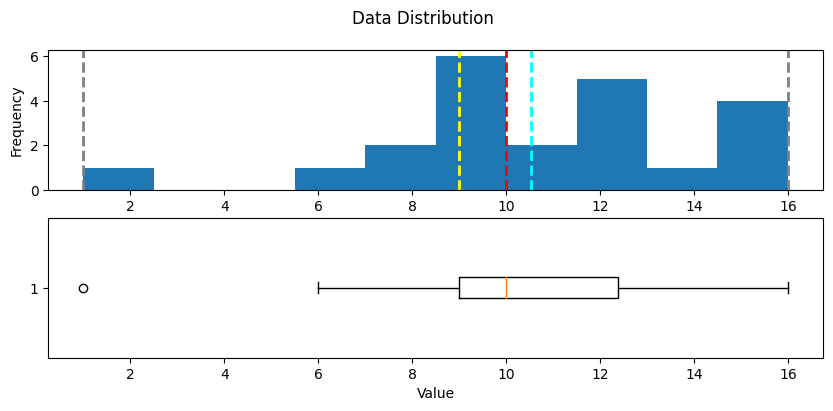

In [14]:
# Get the variable to examine
col = df_students['StudyHours']
# Call the function
show_distribution(col)

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



/tmp/ipykernel_12539/3954886790.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


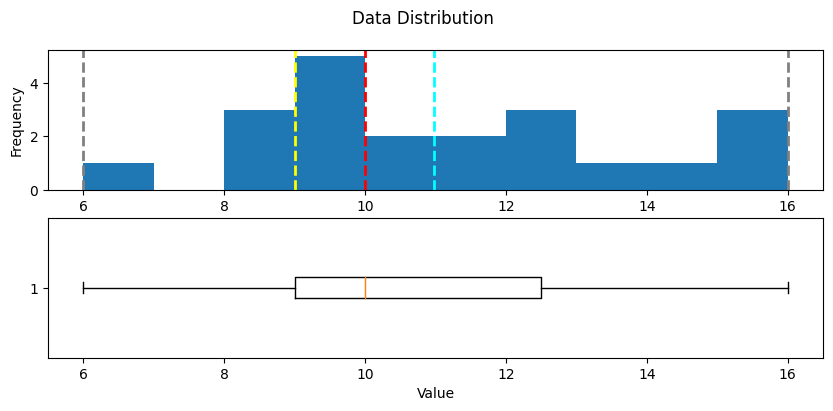

In [15]:
# calculate the 0.01th percentile
q01 = df_students.StudyHours.quantile(0.01)
# Get the variable to examine
col = df_students[df_students.StudyHours>q01]['StudyHours']
# Call the function
show_distribution(col)

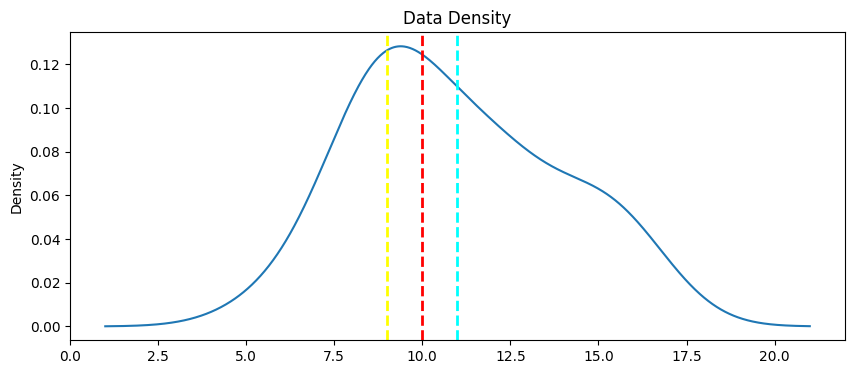

In [18]:
def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of StudyHours
show_density(col)